In [2]:
import yfinance as yf
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume, TrendLine, TrendLineProperties

ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="1y")

Pivot 214 direction: 2, flag_pole: 0.213, flag_size: 0.11065704824905698
Pivot 194 direction: 2, flag_pole: 0.361, flag_size: 0.17973462395840178
Pivot 145 direction: 2, flag_pole: 0.311, flag_size: 0.15073186420130646
Pivot 118 direction: 2, flag_pole: 0.198, flag_size: 0.06855482196947871
Pivot 114 direction: 1, flag_pole: 0.132, flag_size: 0.07653552047826784
Pivot 90 direction: -2, flag_pole: 0.102, flag_size: 0.04589924259775355
Pivot 78 direction: -2, flag_pole: 0.183, flag_size: 0.09268348125143144
Pivot 66 direction: -1, flag_pole: 0.12, flag_size: 0.06514378339914992
Pivot 18 direction: 2, flag_pole: 0.094, flag_size: 0.05777042444569369
Pivot 7 direction: 1, flag_pole: 0.096, flag_size: 0.05125343343068128
Points: 108, 132, 152 on the same line, cos_diff=1.4815001148082985e-07
Points: 48, 58, 87 on the same line, cos_diff=7.923268027232311e-07


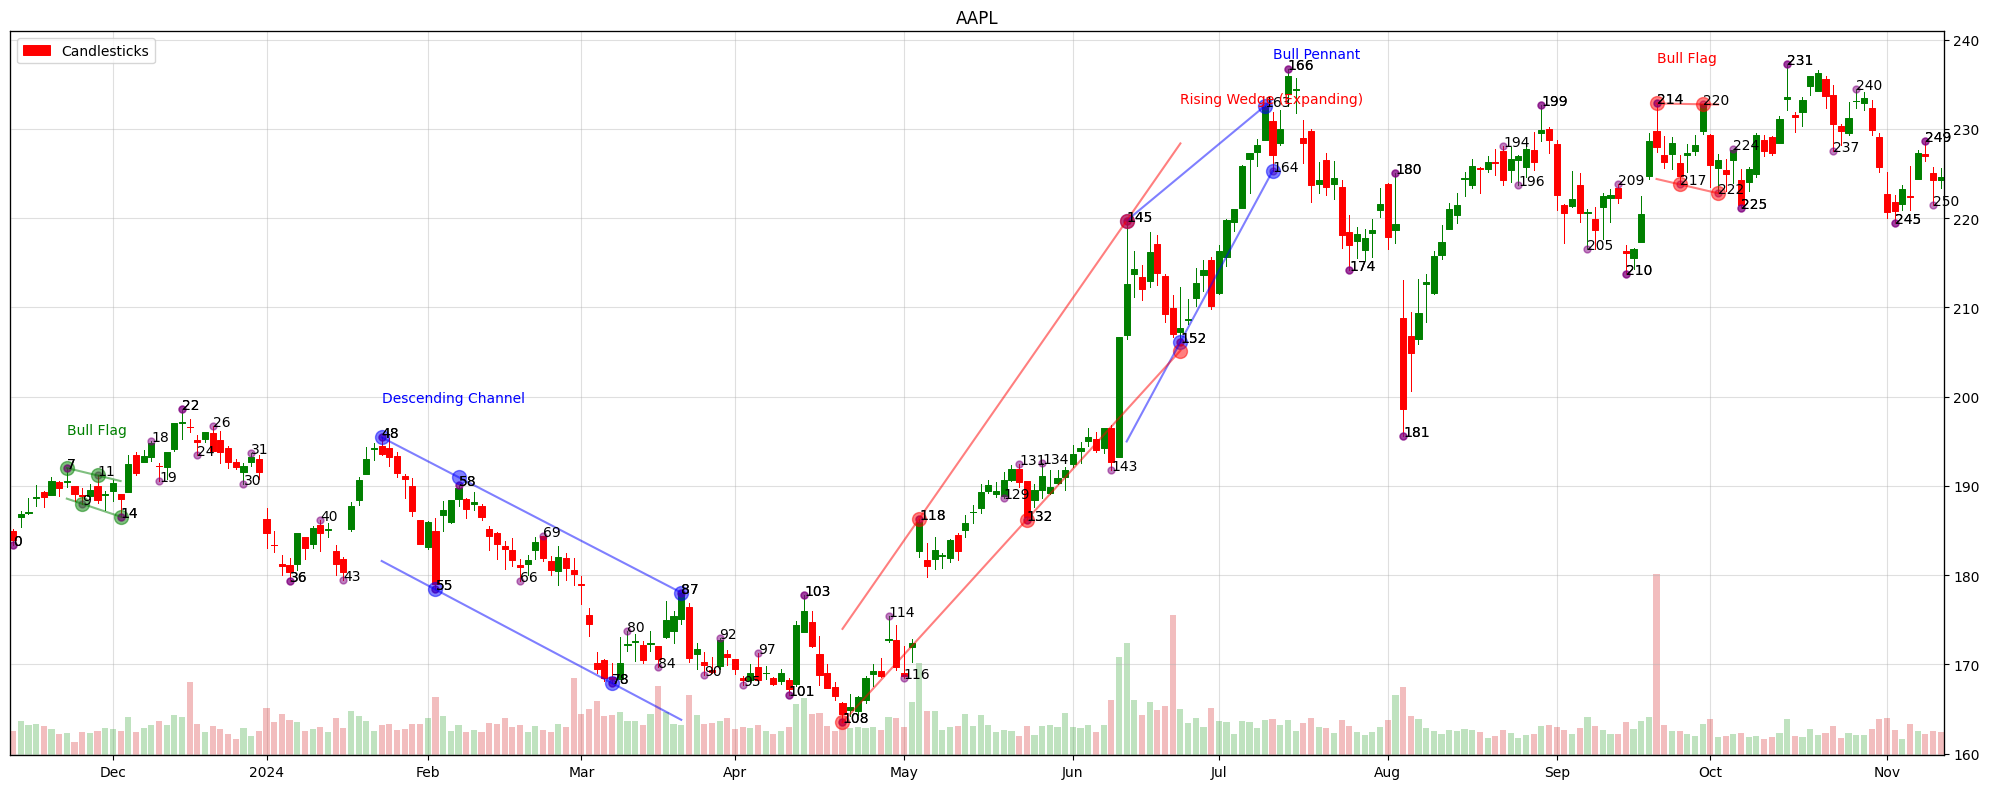

In [3]:
# Configure pattern scanning
scan_props = TrendLineProperties(
        number_of_pivots=5,
        error_ratio=1e-6,
    )

scan_props_pf = TrendLineProperties(
        number_of_pivots=4,
        error_ratio=1e-6,
)

indicators = [
    Candlesticks(colorup="green", colordn="red"),
    Volume(),
    TrendLine(backcandels=2, forwardcandels=2, pivot_limit=100, show_pivots=True, scan_props=scan_props_pf),
    TrendLine(backcandels=5, forwardcandels=5, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    # SMA(50),
    # SMA(200),
    # RSI(),
    # MACD(),
]

chart = Chart(title=ticker, figsize=(20, 8))
chart.plot(prices, indicators)


## Debug Zigzag

In [ ]:
from mplchart.zigzag import Zigzag

zigzag = Zigzag(backcandels=2, forwardcandels=2, pivot_limit=55, offset=0)
prices["high"] = prices["High"]
prices["low"] = prices["Low"]
prices["close"] = prices["Close"]
zigzag.calculate(prices)

for pivot in zigzag.zigzag_pivots:
    print(f"Pivot: time={pivot.point.time}, index={pivot.point.index}, price={pivot.point.price}")
print(f"Number of pivots: {len(zigzag.zigzag_pivots)}")